# Game Recomendations on Steam Platform 

Libraries

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MultiLabelBinarizer

DataFiles

In [334]:
# Read the data from files
path = '/Users/manju/Desktop/Data'
df_games = pd.read_csv(path+"/games.csv")
df_users = pd.read_csv(path+"/users.csv")
df_recommendations = pd.read_csv(path+"/recommendations.csv")
df_genre = pd.read_json(path+'/games_metadata.json', lines=True)

Overview

In [335]:
df_games.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.00,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.00,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.00,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.00,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.00,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.00,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.00,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.00,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.00,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.00,True


In [336]:
df_users.head(10)

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
5,5664667,145,5
6,5889167,447,2
7,7281762,1083,1
8,7445952,273,1
9,7462927,51,1


In [337]:
df_recommendations.head(10)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.30,51580,0
1,304390,4,0,2017-02-17,False,11.50,2586,1
2,1085660,2,0,2019-11-17,True,336.50,253880,2
3,703080,0,0,2022-09-23,True,27.40,259432,3
4,526870,0,0,2021-01-10,True,7.90,23869,4
5,306130,0,0,2021-10-10,True,8.60,45425,5
6,238960,0,0,2017-11-25,True,538.80,88282,6
7,730,0,0,2021-11-30,False,157.50,63209,7
8,255710,0,0,2021-05-21,True,18.70,354512,8
9,289070,0,0,2020-05-26,True,397.50,454422,9


In [338]:
df_genre.head(10)

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
5,250180,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."
6,253980,Experience incredibly atmospheric and intense ...,"[RPG, Action, Fantasy, Third Person, Hack and ..."
7,271850,,"[Strategy, Simulation, Action, RTS, World War II]"
8,282900,"Packed with fast-paced, turn-based RPG action,...","[Anime, JRPG, Female Protagonist, Cute, RPG, S..."
9,19810,Lead a team of domestic counter-terrorism expe...,"[Action, Tactical]"


In [339]:
#Metadata of Dataframes
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB

📄 DataFrame: df_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (tot

In [340]:
# Converting all object columns to string dtype
df_games = df_games.astype({col: 'string' for col in df_games.select_dtypes(include='object').columns})
df_genre = df_genre.astype({col: 'string' for col in df_genre.select_dtypes(include='object').columns})

# Converting the date related columns to date dtype
df_games['date_release'] = pd.to_datetime(df_games['date_release'])
df_recommendations['date'] = pd.to_datetime(df_recommendations['date'])

In [341]:
#Metadata of Dataframes after datatype conversions
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50872 non-null  int64         
 1   title           50872 non-null  string        
 2   date_release    50872 non-null  datetime64[ns]
 3   win             50872 non-null  bool          
 4   mac             50872 non-null  bool          
 5   linux           50872 non-null  bool          
 6   rating          50872 non-null  string        
 7   positive_ratio  50872 non-null  int64         
 8   user_reviews    50872 non-null  int64         
 9   price_final     50872 non-null  float64       
 10  price_original  50872 non-null  float64       
 11  discount        50872 non-null  float64       
 12  steam_deck      50872 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), string(2)
memory usage: 3.7 MB

In [342]:
for name, df in df_list:
    print(f"Total No. of records in \n📄 DataFrame: {name}")
    print(df.shape[0])

Total No. of records in 
📄 DataFrame: df_games
50872
Total No. of records in 
📄 DataFrame: df_users
14306064
Total No. of records in 
📄 DataFrame: df_recommendations
41154794
Total No. of records in 
📄 DataFrame: df_genre
50872


In [343]:
#Checking for Null Values
for name, df in df_list:
    print(f"\n📄 DataFrame Null Values: {name}")
    print(df.isna().sum())


📄 DataFrame Null Values: df_games
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

📄 DataFrame Null Values: df_users
user_id     0
products    0
reviews     0
dtype: int64

📄 DataFrame Null Values: df_recommendations
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

📄 DataFrame Null Values: df_genre
app_id         0
description    0
tags           0
dtype: int64


In [344]:
#Checking for 'app_id' Duplicate Values in all dataframes
for name, df in df_list:
    if 'app_id' in df:
        print(f'Total records count in {name} 📄: ',df.shape[0])
        print(f'Distinct app_id records in {name} 📄: ',df['app_id'].nunique())
        
#Checking for 'user_id' Duplicate Values in df_users
print(f'Total records count in df_users 📄: ',df_users.shape[0])
print(f'Distinct user_id records in df_users 📄: ',df_users['user_id'].nunique()) 

#Checking for duplicated based on combination of app_id & their description
print(f'Total duplicate records count in df_games 📄: ',df_games.duplicated(subset=['app_id', 'title']).sum())
print(f'Total duplicate records count in df_genre 📄: ',df_genre.duplicated(subset=['app_id','description']).sum())     
        

Total records count in df_games 📄:  50872
Distinct app_id records in df_games 📄:  50872
Total records count in df_recommendations 📄:  41154794
Distinct app_id records in df_recommendations 📄:  37610
Total records count in df_genre 📄:  50872
Distinct app_id records in df_genre 📄:  50872
Total records count in df_users 📄:  14306064
Distinct user_id records in df_users 📄:  14306064
Total duplicate records count in df_games 📄:  0
Total duplicate records count in df_genre 📄:  0


Data Preprocessing

In [345]:
df_games['steam_deck'].value_counts()

steam_deck
True     50870
False        2
Name: count, dtype: int64

In [346]:
df_games.groupby('rating')['positive_ratio'].describe()


,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
Mixed,12157.00,57.64,8.23,40.00,51.00,59.00,65.00,69.00
Mostly Negative,1849.00,31.28,5.46,20.00,27.00,32.00,36.00,39.00
Mostly Positive,8738.00,74.56,2.88,70.00,72.00,75.00,77.00,79.00
Negative,303.00,11.85,5.47,0.00,9.00,13.00,16.00,19.00
Overwhelmingly Negative,14.00,14.21,2.81,9.00,13.25,15.00,16.00,18.00
Overwhelmingly Positive,1110.00,96.24,1.11,95.00,95.00,96.00,97.00,100.00
Positive,13502.00,91.21,6.76,80.00,85.00,91.00,100.00,100.00
Very Negative,60.00,13.63,3.38,5.00,11.00,14.00,16.00,19.00
Very Positive,13139.00,88.80,5.14,80.00,85.00,89.00,93.00,100.00


In [347]:
df_games_processed = df_games.copy()
df_games_processed.drop(columns=['win', 'mac','linux','steam_deck','positive_ratio'], inplace=True)

In [348]:

# Define custom order from worst to best (if reversed)
order = ["Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive",
         "Mixed", "Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"][::-1]

# Initialize encoder with the custom order
enc = OrdinalEncoder(categories=[order])

# Transform the 'rating' column to ordinal values
df_games_processed[['rating']] = enc.fit_transform(df_games_processed[['rating']])

In [349]:
df_games_processed

,app_id,title,date_release,rating,user_reviews,price_final,price_original,discount
0,13500,Prince of Persia: Warrior Within™,2008-11-21,7.00,2199,9.99,9.99,0.00
1,22364,BRINK: Agents of Change,2011-08-03,6.00,21,2.99,2.99,0.00
2,113020,Monaco: What's Yours Is Mine,2013-04-24,7.00,3722,14.99,14.99,0.00
3,226560,Escape Dead Island,2014-11-18,4.00,873,14.99,14.99,0.00
4,249050,Dungeon of the ENDLESS™,2014-10-27,7.00,8784,11.99,11.99,0.00
...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,7.00,101,22.00,0.00,0.00
50868,1272080,PAYDAY 3,2023-09-21,3.00,29458,40.00,0.00,0.00
50869,1402110,Eternights,2023-09-11,7.00,1128,30.00,0.00,0.00
50870,2272250,Forgive Me Father 2,2023-10-19,7.00,82,17.00,0.00,0.00


In [350]:
#readjusting the "tags" column by reomving brackets
df_genre['tags'] = df_genre['tags'].str.replace(r"[\[\]\{\}'\"]", "", regex=True)
games_processed = pd.merge(df_games_processed, df_genre[['app_id', 'tags']], on='app_id', how='left')
games_processed['tags'] = games_processed['tags'].str.split(', ')
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(games_processed['tags']), columns=mlb.classes_, index=df.index)

# Step 3: Join with original DataFrame
games_processed = pd.concat([games_processed.drop('tags', axis=1), genre_encoded], axis=1)


In [351]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,price_original,discount,,1980s,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,13500,Prince of Persia: Warrior Within™,2008-11-21,7.00,2199,9.99,9.99,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22364,BRINK: Agents of Change,2011-08-03,6.00,21,2.99,2.99,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,113020,Monaco: What's Yours Is Mine,2013-04-24,7.00,3722,14.99,14.99,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,226560,Escape Dead Island,2014-11-18,4.00,873,14.99,14.99,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
4,249050,Dungeon of the ENDLESS™,2014-10-27,7.00,8784,11.99,11.99,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,7.00,101,22.00,0.00,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
50868,1272080,PAYDAY 3,2023-09-21,3.00,29458,40.00,0.00,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
50869,1402110,Eternights,2023-09-11,7.00,1128,30.00,0.00,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
50870,2272250,Forgive Me Father 2,2023-10-19,7.00,82,17.00,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [352]:
#Droping the review_id column & coverting booolean to numeric
recommendations = df_recommendations.copy()
recommendations.drop(columns=['review_id'], inplace=True)
recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)

In [353]:
df_recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.30,51580,0
1,304390,4,0,2017-02-17,False,11.50,2586,1
2,1085660,2,0,2019-11-17,True,336.50,253880,2
3,703080,0,0,2022-09-23,True,27.40,259432,3
4,526870,0,0,2021-01-10,True,7.90,23869,4
...,...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,True,41.00,1606890,41154789
41154790,758870,8,0,2019-07-18,False,8.00,1786254,41154790
41154791,696170,3,10,2018-03-26,False,2.00,6370324,41154791
41154792,696170,0,0,2018-06-11,True,4.00,1044289,41154792


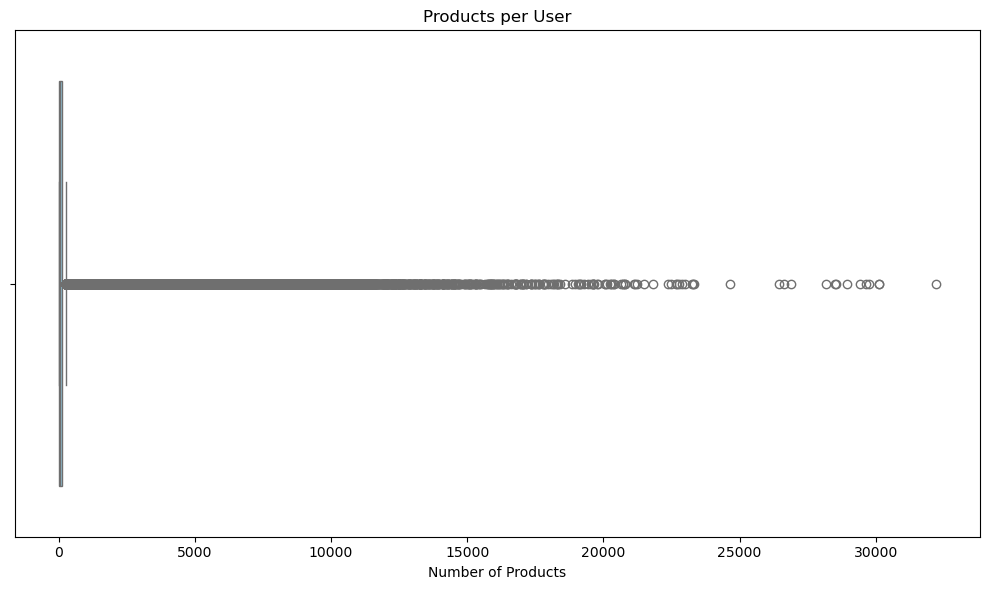

In [354]:
users = df_users.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='products', data=users, color='skyblue')
plt.title('Products per User')
plt.xlabel('Number of Products')
plt.tight_layout()
plt.show()

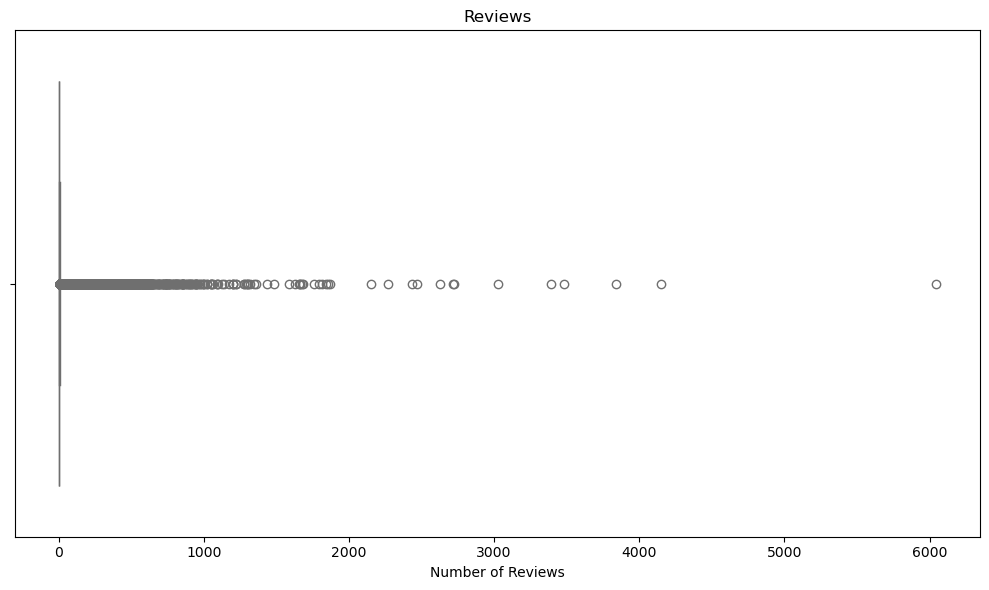

In [355]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='reviews', data=users, color='skyblue')
plt.title('Reviews')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.show()